In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [3]:
from bayesfilt import UnscentedTransform, KalmanFilter

In [4]:
xm = [0., 0.]
xP = np.eye(len(xm))*2.
ut = UnscentedTransform(dim=len(xm), alpha=1.0, beta=0)
ut

:::SigmaPoints
dimension = 2
alpha = 1.0
beta = 0
kappa = 1.0
lambda = 1.0
weights (m) = [0.33333333 0.16666667 0.16666667 0.16666667 0.16666667]
weights (c) = [0.33333333 0.16666667 0.16666667 0.16666667 0.16666667]

In [5]:
### pass through nonlinear function
A = np.eye(2)*2  + 0.1*np.random.randn(2,2)
def myfunc_nd(x):
    return 2 + A @ x**2
    #return np.sin(x)
    #return 2*x+1
def myfunc_1d(x):
    return np.sqrt(np.sum(x**2))
myfunc = myfunc_1d

In [6]:
x_spoints = ut.get_sigma_points(xm, xP)
ym, yP, _ = ut.transform(xm, xP, myfunc)
ym, yP

(array([1.63299316]), array([[1.33333333]]))

In [7]:
x_mpoints = np.atleast_2d(st.multivariate_normal.rvs(mean=xm, cov=xP, size=100000))
y_mpoints = np.array([myfunc(ix) for ix in x_mpoints])
y_mpoints.mean(axis=0), np.cov(y_mpoints.T)

(1.7697398603866412, array(0.85533584))

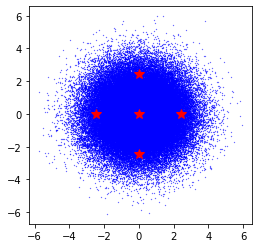

In [8]:
x_spoints = np.asarray(x_spoints)
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(x_mpoints[:,0], x_mpoints[:,1], '.b', markersize=0.5, label='MC')
ax.plot(x_spoints[:,0], x_spoints[:,1], '*r', markersize=10., label='Sigma')